
# **Models**
# 

## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./output/france_N02_all.csv"
df = pd.read_csv(path, sep = ',', decimal='.')#, encoding= 'unicode_escape', on_bad_lines='skip',)
print(df.shape)
print(df.columns)

(5226813, 20)
Index(['Id', 'Id_G', 'lon', 'lat', 'snap3', 'EmisAnneeKg', 'Id_Lin', 'Id_Col',
       'Id_Lin_G', 'Id_Col_G', 'EmisAnneeKgSum', 'sum_pop',
       'trafficvol_sum_MR', 'trafficvol_sum_FC', 'trafficvol_sum_SC',
       'Class_0', 'Class_1', 'Class_2', 'Class_3', 'proportion'],
      dtype='object')


## Choose Vehicle Type

In [3]:
vehicle = 'all'
# vehicle = 70203

In [4]:
if vehicle == 'all':
        # Choose all vehicules:
        df = df.groupby(by=["Id"]).agg({"Id":np.mean, "lon":np.mean, "lat":np.mean, 'Id_Lin':np.mean, 'Id_Col':np.mean, 'Id_Lin_G':np.mean,
        'Id_Col_G':np.mean, 'Id_G':np.mean, 'sum_pop':np.mean, 'Class_0':np.mean, 'Class_1':np.mean,
        'Class_2':np.mean, 'Class_3':np.mean, "trafficvol_sum_MR": np.mean,
                "trafficvol_sum_FC":np.mean, "trafficvol_sum_SC": np.mean, "proportion": np.sum, "EmisAnneeKgSum": np.sum,})
        print(df.shape)
else:
        # OR choose a single vehicle
        df = df[df["snap3"]==vehicle]
        # Recalculate sum and proportion
        df2 = df.groupby(['Id_G'])['EmisAnneeKg'].sum().reset_index()
        df2 = df2.rename(columns={"EmisAnneeKg": "EmisAnneeKgSum"})
        df.drop('EmisAnneeKgSum', axis=1)
        df = df.merge(df2, how='left', on="Id_G")
        df = df.rename(columns={"EmisAnneeKgSum_y": "EmisAnneeKgSum"})
        df["proportion"] = df["EmisAnneeKg"]/df["EmisAnneeKgSum"]
        df["proportion"].fillna(0,inplace=True)

# Roads calculation
column_names = ['trafficvol_sum_MR', 'trafficvol_sum_FC', 'trafficvol_sum_SC']
df['trafficvol_sum_total']= df[column_names].sum(axis=1)

# Add column of the log of the parameter we search to predict and of other variables
df["Log_proportion"] = np.log(df["proportion"]+1)
df["Log_sum_pop"] = np.log(df["sum_pop"]+1)
df["Log_trafficvol_sum_SC"] = np.log(df["trafficvol_sum_SC"]+1)
df["Log_trafficvol_sum_total"] = np.log(df["trafficvol_sum_total"]+1)

# Format proportion
df['proportion'] = pd.to_numeric(df['proportion'].map('{:.5f}'.format))

(2370695, 18)


In [5]:
df

,Id,lon,lat,Id_Lin,Id_Col,Id_Lin_G,Id_Col_G,Id_G,sum_pop,Class_0,...,trafficvol_sum_MR,trafficvol_sum_FC,trafficvol_sum_SC,proportion,EmisAnneeKgSum,trafficvol_sum_total,Log_proportion,Log_sum_pop,Log_trafficvol_sum_SC,Log_trafficvol_sum_total
Id,,,,,,,,,,,,,,,,,,,,,
1,1.0,-5.17,41.33,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,-5.16,41.33,1.0,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,-5.15,41.33,1.0,3.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,-5.14,41.33,1.0,4.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,-5.14,41.33,1.0,5.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370691,2370691.0,9.54,51.13,1255.0,1885.0,125.0,188.0,23814.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2370692,2370692.0,9.55,51.13,1255.0,1886.0,125.0,188.0,23814.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2370693,2370693.0,9.56,51.13,1255.0,1887.0,125.0,188.0,23814.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Choose Roads according to vehicle type

In [6]:
# Roads choice: if all vehicles ('trafficvol_sum_total'), if 70302 ('trafficvol_sum_SC') ...
trafficvol_choice = 'Log_trafficvol_sum_total'
# can be logarithmic or not

Normalize data

In [7]:
# Data normalization:
for name in ['sum_pop', 'trafficvol_sum_SC', 'trafficvol_sum_total', 'Log_sum_pop', 'Log_trafficvol_sum_SC', 'Log_trafficvol_sum_total']:
    df[name] = (df[name] - np.mean(df[name])) / np.std(df[name])

In [8]:
print(df.columns)

Index(['Id', 'lon', 'lat', 'Id_Lin', 'Id_Col', 'Id_Lin_G', 'Id_Col_G', 'Id_G',
       'sum_pop', 'Class_0', 'Class_1', 'Class_2', 'Class_3',
       'trafficvol_sum_MR', 'trafficvol_sum_FC', 'trafficvol_sum_SC',
       'proportion', 'EmisAnneeKgSum', 'trafficvol_sum_total',
       'Log_proportion', 'Log_sum_pop', 'Log_trafficvol_sum_SC',
       'Log_trafficvol_sum_total'],
      dtype='object')


## Train, Test Split

In [9]:
df_nozeros = df[df["EmisAnneeKgSum"]!=0]
print("A total of",  df.shape[0] - df_nozeros.shape[0], "rows were removed from", df.shape[0],"\nThis corresponds to: {:.1f} % of the total".format( (df.shape[0]-df_nozeros.shape[0])/df.shape[0]*100) )

A total of 1280025 rows were removed from 2370695 
This corresponds to: 54.0 % of the total


In [10]:
X =  df[["Class_0","Class_1","Class_2", "Log_sum_pop", trafficvol_choice]]
y =  df[["Log_proportion"]]

# We train and test WITHOUT ZERO VALUES
X_nz = df_nozeros[["Class_0","Class_1","Class_2", "Log_sum_pop", trafficvol_choice]]
y_nz = df_nozeros[["Log_proportion"]]
X0 = df_nozeros[["Log_sum_pop", trafficvol_choice]][df_nozeros["Class_0"]==1]
X1 = df_nozeros[["Log_sum_pop", trafficvol_choice]][df_nozeros["Class_1"]==1]
X2 = df_nozeros[["Log_sum_pop", trafficvol_choice]][df_nozeros["Class_2"]==1]
y0 = df_nozeros[df_nozeros["Class_0"]==1.0][["Log_proportion"]]
y1 = df_nozeros[df_nozeros["Class_1"]==1.0][["Log_proportion"]]
y2 = df_nozeros[df_nozeros["Class_2"]==1.0][["Log_proportion"]]


In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set 70% training and 30% test
X_all, y_all = np.array(X), np.array(y).reshape(-1, 1)
X_nz, y_nz = np.array(X_nz), np.array(y_nz).reshape(-1, 1)
X0, y0 = np.array(X0), np.array(y0).reshape(-1, 1)
X1, y1 = np.array(X1), np.array(y1).reshape(-1, 1)
X2, y2 = np.array(X2), np.array(y2).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X_nz, y_nz, test_size=0.3, shuffle=True)  
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0,y0, test_size=0.3, shuffle=True)  
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.3, shuffle=True)  
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3, shuffle=True)  

In [12]:
print("X_all shape:   ",X_all.shape)
print("y_all shape:   ",y_all.shape)

print("X_nz shape:    ",X_nz.shape)
print("y_nz shape:    ",y_nz.shape)

print("\nX_train0 shape: ",X_train0.shape, "      y_test0 shape: ",y_test0.shape)
print("X_train1 shape: ",X_train1.shape, "    y_test1 shape: ",y_test1.shape)
print("X_train2 shape: ",X_train2.shape, "   y_test2 shape: ",y_test2.shape)

X_all shape:    (2370695, 5)
y_all shape:    (2370695, 1)
X_nz shape:     (1090670, 5)
y_nz shape:     (1090670, 1)

X_train0 shape:  (422, 2)       y_test0 shape:  (181, 1)
X_train1 shape:  (64643, 2)     y_test1 shape:  (27705, 1)
X_train2 shape:  (459487, 2)    y_test2 shape:  (196923, 1)


# Import Models

In [208]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [209]:
# # the models to be used in the pipeline
# models = [
#    LinearRegression()
#    MLPRegressor(),
#    RandomForestRegressor(),
#    SVR(),
#    SGDRegressor(),
#    LinearRegression(),
#    AdaBoostRegressor()
# ]

# for model in models:
#    Reg = model.fit(X_train, y_train)
#    # TESTING : Make prediction on test dataset
#    score = cross_val_score(Reg, X_test, y_test, cv=3)
#    print(f"{model.__class__.__name__}: %0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))


In [210]:
# Create model objects

############ Linear Regressor ##########
x_sm = sm.add_constant(X_train) # adding a constant
LinRegr = sm.OLS(y_train, x_sm).fit()

############ Gradient Boosting Regressor ##########
GBreg = HistGradientBoostingRegressor()
GBreg.fit(np.array(X_train), np.ravel(y_train))
score = cross_val_score(GBreg, X_test, np.ravel(y_test), cv=3)
print(f"GB :     %0.3f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

############ SGDRegressor ##########
#     #The model and training
# SGDReg = SGDRegressor(max_iter=1000, tol=1e-3, alpha=0.01, random_state=42)
# SGDReg.fit(X_train, np.ravel(y_train))
# # TESTING : Make prediction on test dataset
# score = cross_val_score(SGDReg, X_test, y_test, cv=3)
# print(f"SGD: %0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# ############ MLPerceptron ############
MLPreg = MLPRegressor()
MLPreg.fit(np.array(X_train),np.ravel(y_train))
score = cross_val_score(MLPreg, X_test, np.ravel(y_test), cv=3)
print(f"MLP:     %0.2f accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

############ RandomForestRegressor ############
RFreg = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
RFreg.fit(np.array(X_train), np.ravel(y_train))
score = cross_val_score(RFreg, X_test, np.ravel(y_test), cv=3)
print(f"RF :     %0.3f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

############ SVMRegressor ############
# TAKES TOO LONG
# SVReg = SVR(kernel='poly', C=1.0, epsilon=0.1)
# SVReg.fit(X_train, np.ravel(y_train))
# score = cross_val_score(SVReg, X_test, y_test, cv=3)
# print(f"SVM: %0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

# ############ AdaBoostRegressor ############
# AdaReg = AdaBoostRegressor(n_estimators=50, random_state=42)
# AdaReg.fit(X_train, np.ravel(y_train))
# score = cross_val_score(AdaReg, X_test, y_test, cv=3)
# print(f"Ada: %0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))


GB :     0.289 accuracy with a standard deviation of 0.01
MLP:     0.20 accuracy with a standard deviation of 0.050
RF :     0.289 accuracy with a standard deviation of 0.01


In [211]:
############ Linear Regressor ##########
LinRegrSummary = LinRegr.summary()
print(LinRegrSummary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                 5.038e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        23:42:15   Log-Likelihood:             1.9567e+06
No. Observations:              763469   AIC:                        -3.913e+06
Df Residuals:                  763463   BIC:                        -3.913e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064   3.82e-05    167.817      0.0

## Prediction

In [212]:
# PREDICTION

############ Original values ##########
y_target = np.exp(y)-1

############ Linear Regressor ##########
y_pred_Linear  = LinRegr.predict(sm.add_constant(np.array(X)))
proportion_pred_Linear  = np.exp(y_pred_Linear)-1
proportion_pred_Linear = np.clip(proportion_pred_Linear,0,1)

############ Gradient Boosting Regressor ##########
y_pred_GB  = GBreg.predict(np.array(X))
proportion_pred_GB  = np.exp(y_pred_GB)-1
proportion_pred_GB = np.clip(proportion_pred_GB,0,1)

# ############SGDRegressor ##########
# y_pred_SGD = SGDReg.predict(X)
# proportion_pred_SGD = np.exp(y_pred_SGD)-1
# proportion_pred_SGD = np.clip(proportion_pred_SGD,0,1)

# ############ MLPerceptron ##########
y_pred_MLP = MLPreg.predict(np.array(X))
proportion_pred_MLP = np.exp(y_pred_MLP)-1
proportion_pred_MLP = np.clip(proportion_pred_MLP,0,1)

############ RandomForestRegressor ##########
y_pred_RF  = RFreg.predict(np.array(X))
proportion_pred_RF  = np.exp(y_pred_RF)-1
proportion_pred_RF = np.clip(proportion_pred_RF,0,1)

############ SVMRegressor ##########
# y_pred_SV  = SVReg.predict(np.array(X))
# proportion_pred_SV  = np.exp(y_pred_SV)-1
# proportion_pred_SV = np.clip(proportion_pred_SV,0,1)

# ############ AdaBoostRegressor ##########
# y_pred_Ada = AdaReg.predict(X)
# proportion_pred_Ada = np.exp(y_pred_Ada)-1
# proportion_pred_Ada = np.clip(proportion_pred_Ada,0,1)

# ############ Neural Network ##########
# proportion_pred_NN = np.exp(y_pred_NN)-1
# proportion_pred_NN = np.clip(proportion_pred_NN,0,1)

## Metrics

In [213]:
# Import metrics
from sklearn import metrics

# Calcuate accuracy
print('Linear R2 Coefficient : {0:.3f}'.format(metrics.r2_score(y, y_pred_Linear)))
print('Linear Explained Variance : {0:.3f}'.format(metrics.explained_variance_score(y, y_pred_Linear)))
print('\nGB R2 Coefficient : {0:.3f}'.format(metrics.r2_score(y, y_pred_GB)))
print('GB Explained Variance : {0:.3f}'.format(metrics.explained_variance_score(y, y_pred_GB)))
print('\nRF  R2 Coefficient : {0:.3f}'.format(metrics.r2_score(y, y_pred_RF)))
print('RF  Explained Variance : {0:.3f}'.format(metrics.explained_variance_score(y, y_pred_RF)))
print('\nMLP  R2 Coefficient : {0:.3f}'.format(metrics.r2_score(y, y_pred_MLP)))
print('MLP  Explained Variance : {0:.3f}'.format(metrics.explained_variance_score(y, y_pred_MLP)))

# mse = metrics.mean_squared_error(y_test, y_pred_RF) 
# print('Random Forest MSE : {0:.2f}'.format(mse))
# print('Random Forest RMSE : {0:.2f}'.format(np.sqrt(mse)))

Linear R2 Coefficient : 0.282
Linear Explained Variance : 0.305

GB R2 Coefficient : 0.352
GB Explained Variance : 0.354

RF  R2 Coefficient : 0.349
RF  Explained Variance : 0.352

MLP  R2 Coefficient : 0.340
MLP  Explained Variance : 0.349


In [214]:
from sklearn.tree import export_graphviz
from graphviz import Source

# Export one tree from forest to visualize
feature_importances = RFreg.feature_importances_
reg_tree = RFreg.estimators_[1]

# # Export one tree to "plot_tree.pdf"
# plot_tree = export_graphviz(reg_tree, out_file=None, feature_names=["Class_0","Class_1","Class_2", "Log_sum_pop", "Log_trafficvol_sum_SC"], filled=True) 
# graph = Source(plot_tree) 
# graph.render("reg_tree")

# # Plot the tree
# graph

# Most important features and its weights
print("Feature Importance: ")
for i,feature_value in enumerate(feature_importances):
    print(X.columns[i], " = ", feature_value)


Feature Importance: 
Class_0  =  2.8789099588995143e-05
Class_1  =  0.022707471156070157
Class_2  =  0.008803447147240935
Log_sum_pop  =  0.1458405782705547
Log_trafficvol_sum_total  =  0.8226197143265452


We can observe that the most importat feature is the Traffic Volume, followed by the Population.
The least important feature is the Class 0.

## Histograms

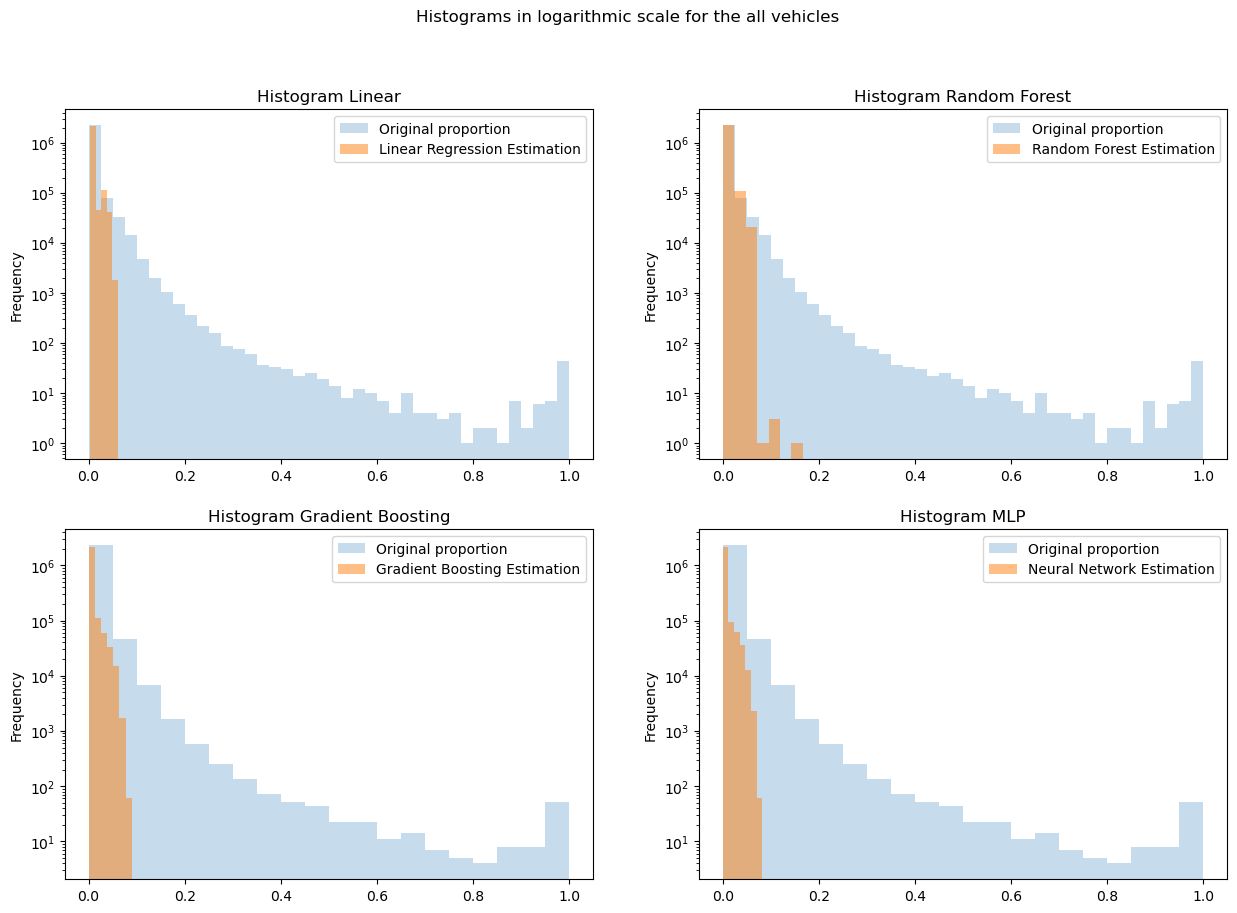

In [217]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Histograms in logarithmic scale for the all vehicles')

plt.subplot(2,2,1)
plt.hist(x=y_target, bins=40, alpha=0.25, rwidth=0.85, histtype='stepfilled', label='Original proportion')
plt.hist(x=proportion_pred_Linear, bins=5,alpha=0.5, rwidth=0.85, histtype='stepfilled', label= 'Linear Regression Estimation',log=True)
plt.title('Histogram Linear')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2,2,3)
plt.hist(x=np.ravel(y_target), bins=20, alpha=0.25, rwidth=0.85, histtype='stepfilled', label='Original proportion')
plt.hist(x=proportion_pred_GB, bins=7, alpha=0.5, rwidth=0.85, histtype='stepfilled', label= 'Gradient Boosting Estimation',log=True)
plt.title('Histogram Gradient Boosting')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2,2,4)
plt.hist(x=y_target, bins=20, alpha=0.25, rwidth=0.85, histtype='stepfilled', label='Original proportion', log=False)
plt.hist(x=np.clip(proportion_pred_MLP,0,1), bins=7,alpha=0.5, rwidth=0.85, histtype='stepfilled', label= 'Neural Network Estimation',log=True)
plt.title('Histogram MLP')
# plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2,2,2)
plt.hist(x=y_target, bins=40, alpha=0.25, rwidth=0.85, histtype='stepfilled', label='Original proportion')
plt.hist(x=proportion_pred_RF, bins=7,alpha=0.5, rwidth=0.85, histtype='stepfilled', label= 'Random Forest Estimation',log=True)
plt.title('Histogram Random Forest')
# plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# # plt.subplot(5,1,4)
# # plt.hist(x=y_target, bins='auto',alpha=0.5, rwidth=0.85, histtype='stepfilled', label='Original proportion')
# # plt.hist(x=proportion_pred_SV, bins='auto', color='#0504aa',alpha=0.25, rwidth=0.85, histtype='stepfilled', label= 'Neural Network Estimation',log=True)
# # plt.title('Histogram RF')
# # plt.xlabel('Value')
# # plt.ylabel('Frequency')
# # plt.legend()

# plt.subplot(3,1,3)
# plt.hist(x=y_target, bins=20,alpha=0.25, rwidth=0.85, histtype='stepfilled', label='Original proportion')
# plt.hist(x=proportion_pred_Ada, bins=20, alpha=0.5, rwidth=0.85, histtype='stepfilled', label= 'Ada Estimation',log=True)
# plt.title('Histogram Ada')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.legend()

## Deep Learning (Neural Networks)

### Pytorch:

In [144]:
from torch.utils.data import Dataset

# Define Custom Dataset
class DatasetCustom(Dataset):
    def __init__(self, data, label):
        # Data is an array of N x 5
        self.data = data
        # Label is an array of N x 1
        self.label = label
        # Id G to compute loss constraint
        # self.Id_G = Id_G
        
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, index):
        return self.data[index,:], self.label[index]

In [145]:
# Define train and test data:
all_data   = DatasetCustom(X_all,  y_all)
train_data = DatasetCustom(X_train,y_train)
test_data  = DatasetCustom(X_test, y_test)

train_data0 = DatasetCustom(X_train0,y_train0)
train_data1 = DatasetCustom(X_train1,y_train1)
train_data2 = DatasetCustom(X_train2,y_train2)

test_data0  = DatasetCustom(X_test0, y_test0)
test_data1  = DatasetCustom(X_test1, y_test1)
test_data2  = DatasetCustom(X_test2, y_test2)

all_data0   = DatasetCustom(X0,y0)
all_data1   = DatasetCustom(X1,y1)
all_data2   = DatasetCustom(X2,y2)

### Dataset Loader

In [146]:
import torch
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 32
valid_size = 0.2

def create_data_loaders(batch_size, valid_size, train_data, test_data):
    # define sizes
    num_train, num_test = len(train_data), len(test_data)

    # obtain training indices that will be used for validation
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_index, valid_index = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_index)
    valid_sampler = SubsetRandomSampler(valid_index)

    # prepare data loaders
    train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = train_sampler)
    valid_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = valid_sampler)
    
    # test data loader
    test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
    
    return train_loader, valid_loader, test_loader

In [147]:
train_loader, valid_loader, test_loader = create_data_loaders(batch_size, valid_size, train_data, test_data)

train_loader0, valid_loader0, test_loader0 = create_data_loaders(batch_size, valid_size, train_data0, test_data0)
train_loader1, valid_loader1, test_loader1 = create_data_loaders(batch_size, valid_size, train_data1, test_data1)
train_loader2, valid_loader2, test_loader2 = create_data_loaders(batch_size, valid_size, train_data2, test_data2)

In [148]:
data_loader0 = torch.utils.data.DataLoader(all_data0, batch_size = batch_size, shuffle=True)
data_loader1 = torch.utils.data.DataLoader(all_data1, batch_size = batch_size, shuffle=True)
data_loader2 = torch.utils.data.DataLoader(all_data2, batch_size = batch_size, shuffle=True)

# loader_with_class = torch.utils.data.DataLoader(, batch_size = batch_size, shuffle=True)

#### Neural Network architecture definition:


In [149]:
import torch.nn as nn
import torch.optim as optim

# Declare a class for nonlinear regression
class nonlinear_regression_nn(nn.Module):
    
    # class initialization
    def __init__(self, input_size, hidden_size, output_size):
        super(nonlinear_regression_nn, self).__init__()
        self.fc0 = nn.Linear(input_size, hidden_size)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, output_size)
        self.relu= nn.ReLU()
        #self.softmax = nn.Softmax(output_size)

    # function to apply the neural network
    def forward(self, x):
        out = self.fc0(x)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        out = self.relu(out)
        y_pred = self.fc5(out)
        #y_pred = self.softmax(out)
        return y_pred


Select device:

In [150]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device '+str(device))

Using device cpu


In [151]:
# Create the neural network 
#    input size: amount of input data columns for x
#    hidden size: 64 neurons (x3)
#    output size: size of y (=1)
model0 = nonlinear_regression_nn(input_size=X_train0.shape[1], hidden_size=64, output_size=1)
model1 = nonlinear_regression_nn(input_size=X_train1.shape[1], hidden_size=64, output_size=1)
model2 = nonlinear_regression_nn(input_size=X_train2.shape[1], hidden_size=64, output_size=1)

# Send to device
model0.to(device=device)
model1.to(device=device)
model2.to(device=device)

nonlinear_regression_nn(
  (fc0): Linear(in_features=2, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [152]:
from torchsummary import summary
s=summary(model0, X_train0.shape) 

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 13, 64]              192
├─ReLU: 1-2                              [-1, 13, 64]              --
├─Linear: 1-3                            [-1, 13, 64]              4,160
├─ReLU: 1-4                              [-1, 13, 64]              --
├─Linear: 1-5                            [-1, 13, 64]              4,160
├─ReLU: 1-6                              [-1, 13, 64]              --
├─Linear: 1-7                            [-1, 13, 64]              4,160
├─ReLU: 1-8                              [-1, 13, 64]              --
├─Linear: 1-9                            [-1, 13, 64]              4,160
├─ReLU: 1-10                             [-1, 13, 64]              --
├─Linear: 1-11                           [-1, 13, 1]               65
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
Total mult-adds (M): 0.02
Input size (MB): 0.00
Forward/backward pass si

### Training:

In [153]:
# Define Optimizers
optimizer0 = torch.optim.SGD(model0.parameters(),lr = 0.01) 
optimizer1 = torch.optim.SGD(model1.parameters(),lr = 0.01) 
optimizer2 = torch.optim.SGD(model2.parameters(),lr = 0.01) 

In [154]:
# Define Loss Criterion
criterion = nn.MSELoss()

In [155]:
n_epochs = 50 # number of epochs to train the model

def training(n_epochs, train_loader, valid_loader, model, criterion, optimizer):

    # lambda_ = 0.6
    train_losses, valid_losses = [], []
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf  # set initial "min" to infinity

    # Loop on epochs
    for epoch in range(n_epochs):
        train_loss, valid_loss = 0, 0
        
        model.train()
        for data,label in train_loader:
            data = data.to(device=device, dtype=torch.float32)
            label = label.to(device=device, dtype=torch.float32)
            optimizer.zero_grad() # clear the gradients of all optimized variables
            output = model(data) # compute the prediction using the previous parameters of the neural network
            # compute the loss adding the constraint that for each Id_G, the sum has to be equal to 1
            #df['y_pred'] = y_pred.detach().numpy()
            #contraint = lambda_ * np.sum([(df.loc[df['Id_G'] == i, 'y_pred'].sum() - 1) for i in df['Id_G'].unique()])
            #loss = criterion(output, label.type(torch.float32))# + torch.tensor(contraint)
            loss = criterion(output, label) # calculate the loss
            loss.backward() # backward pass: compute gradient of the loss with respect to model parameters
            optimizer.step() # perform a single optimization step (parameter update)
            train_loss += loss.item() * data.size(0) # update running training loss
        
        # validate the model
        model.eval()
        for data, label in valid_loader:
            data = data.to(device=device, dtype=torch.float32)
            label = label.to(device=device, dtype=torch.float32)
            with torch.no_grad():
                output = model(data)
            loss = criterion(output,label)
            valid_loss += loss.item() * data.size(0)
      
        # calculate average loss over an epoch
        train_loss /= len(train_loader.sampler)
        valid_loss /= len(valid_loader.sampler)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
      
        if epoch/10 % 1 == 0:
            print('epoch: {} \ttraining Loss: {:.6f} \tvalidation Loss: {:.6f}'.format(epoch+1, train_loss, valid_loss))

        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            # print('validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            # valid_loss_min,
            # valid_loss))
            torch.save(model.state_dict(), 'model.pt')
            valid_loss_min = valid_loss
    
    return train_losses, valid_losses

In [156]:
# TRAIN and choose the model with the lowest validation loss:
train_losses0, valid_losses0 = training(n_epochs, train_loader0, valid_loader0, model0, criterion, optimizer0)
model0.load_state_dict(torch.load('model.pt', map_location=device))
train_losses1, valid_losses1 = training(n_epochs, train_loader1, valid_loader1, model1, criterion, optimizer1)
model1.load_state_dict(torch.load('model.pt', map_location=device))
train_losses2, valid_losses2 = training(n_epochs, train_loader2, valid_loader2, model2, criterion, optimizer2)
model2.load_state_dict(torch.load('model.pt', map_location=device))

epoch: 1 	training Loss: 0.058920 	validation Loss: 0.015548
epoch: 11 	training Loss: 0.036878 	validation Loss: 0.004949
epoch: 21 	training Loss: 0.024526 	validation Loss: 0.000934
epoch: 31 	training Loss: 0.017619 	validation Loss: 0.000141
epoch: 41 	training Loss: 0.013767 	validation Loss: 0.000786
epoch: 1 	training Loss: 0.002159 	validation Loss: 0.002157
epoch: 11 	training Loss: 0.002110 	validation Loss: 0.002131
epoch: 21 	training Loss: 0.002108 	validation Loss: 0.002130
epoch: 31 	training Loss: 0.002107 	validation Loss: 0.002128
epoch: 41 	training Loss: 0.002107 	validation Loss: 0.002126
epoch: 1 	training Loss: 0.000857 	validation Loss: 0.000884
epoch: 11 	training Loss: 0.000839 	validation Loss: 0.000874
epoch: 21 	training Loss: 0.000838 	validation Loss: 0.000873
epoch: 31 	training Loss: 0.000838 	validation Loss: 0.000873
epoch: 41 	training Loss: 0.000838 	validation Loss: 0.000873


<All keys matched successfully>

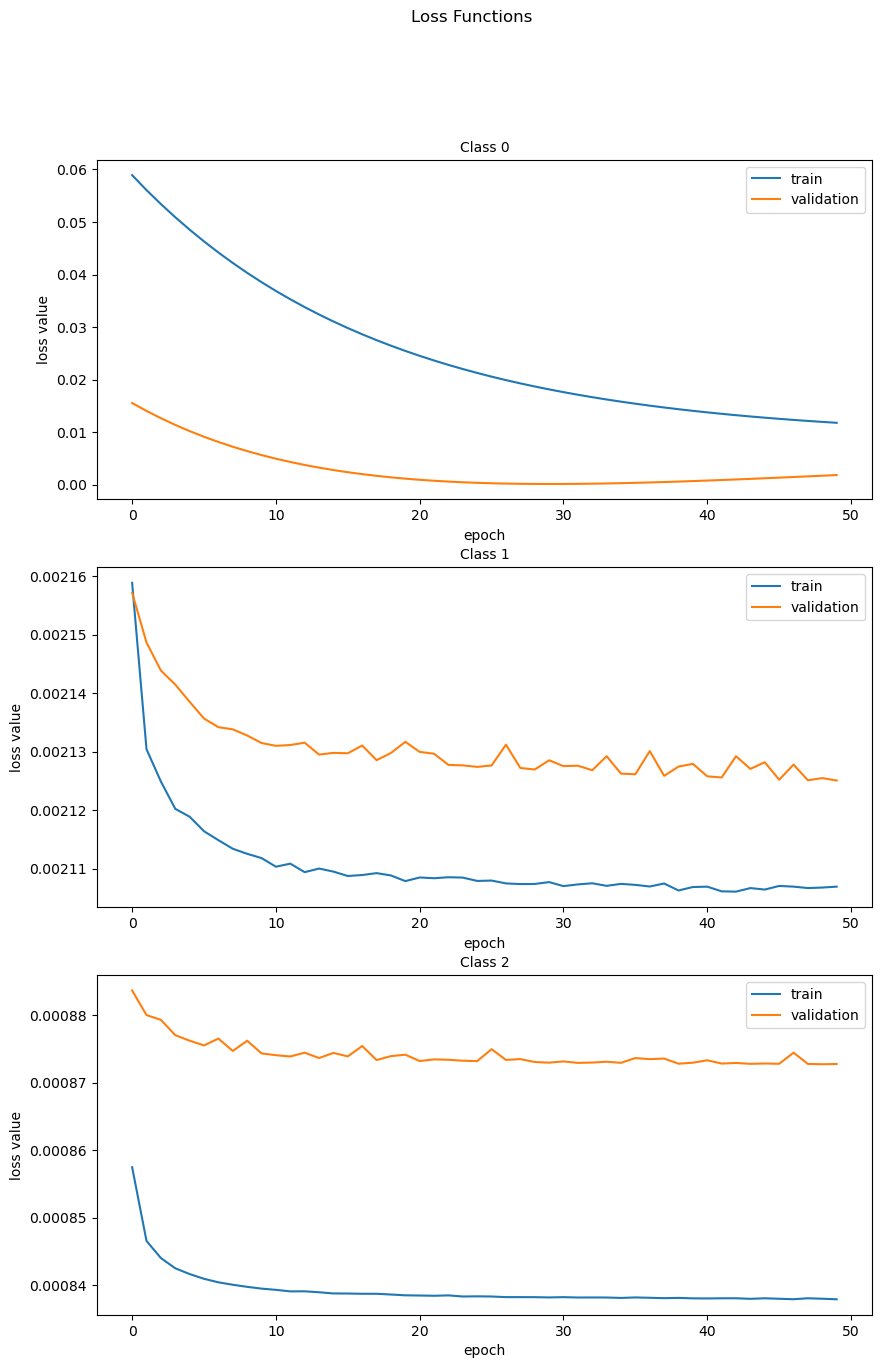

In [157]:
import matplotlib.pyplot as plt
train_losses = train_losses0, train_losses1, train_losses2
valid_losses = valid_losses0, valid_losses1, valid_losses2
title  = ['Class 0', 'Class 1', 'Class 2']
# Plot the loss function for each model
fig, axs = plt.subplots(3, figsize=(10,15))
fig.suptitle('Loss Functions')
i = 0
for ax in axs:
    ax.plot(range(n_epochs), train_losses[i])
    ax.plot(range(n_epochs), valid_losses[i])
    ax.legend(['train', 'validation'], prop={'size': 10})
    ax.set_title(title[i], size=10)
    ax.set_xlabel('epoch', size=10)
    ax.set_ylabel('loss value', size=10)
    i += 1

### Evaluation

In [158]:
def evaluation(model, test_loader, criterion): 

    test_loss = 0.0

    model.eval()
    for data, label in test_loader:
        data = data.to(device=device, dtype=torch.float32)
        label = label.to(device=device, dtype=torch.long)
        with torch.no_grad():
            output = model(data)
        loss = criterion(output, label)
        test_loss += loss.item()*data.size(0)
        
    test_loss = test_loss/len(test_loader.sampler)
    print('test Loss: {:.6f}\n'.format(test_loss))

In [159]:
evaluation(model0,test_loader0,criterion)
evaluation(model1,test_loader1,criterion)
evaluation(model2,test_loader2,criterion)

test Loss: 0.000648

test Loss: 0.000750

test Loss: 0.000422



### Predictions

In [160]:
def get_all_prediction(model, loader): 
    preds = []
    targets = []
    for data, label in loader:
        data = data.to(device=device, dtype=torch.float32)
        label = label.to(device=device, dtype=torch.float32)
        with torch.no_grad():
            output = model.forward(data)
        targets = np.append(targets,label.numpy())
        preds = np.append(preds, output.numpy())
    return targets, preds

In [161]:
# Get all predictions
targets0, preds0 = get_all_prediction(model0, data_loader0)
print(targets0.shape)
targets1, preds1 = get_all_prediction(model1, data_loader1)
print(targets1.shape)
targets2, preds2 = get_all_prediction(model2, data_loader2)
print(targets2.shape)

(19,)
(26782,)
(356081,)


In [162]:
def get_all_prediction_dataframe(models, X_all): 
    preds = []
    for data in X_all:
        data = torch.tensor(data).to(device=device, dtype=torch.float32)
        with torch.no_grad():
            if data[0] == 1:
                output = models[0].forward(data[3:])
            if data[1] == 1:
                output = models[1].forward(data[3:])
            if data[2] == 1:
                output = models[2].forward(data[3:])
        preds = np.append(preds, output.numpy())
    return preds

In [163]:
# THIS TAKES TOO MUCH TIME
# models = [model0, model1, model2]
# y_pred_NN = get_all_prediction_dataframe(models, X_all)
# print(y_pred_NN.shape)

### Metrics:

In [167]:
r2_nn  = (metrics.r2_score(targets0, preds0) + metrics.r2_score(targets1, preds1) + metrics.r2_score(targets2, preds2))/3
var_nn = (metrics.explained_variance_score(targets0, preds0) + metrics.explained_variance_score(targets1, preds1) + metrics.explained_variance_score(targets2, preds2))/3

print('Neural Network  R2 Coefficient : {0:.3f}'.format(r2_nn))
print('Neural Network  Explained Variance : {0:.3f}'.format(var_nn))

Neural Network  R2 Coefficient : -0.220
Neural Network  Explained Variance : 0.008


## Histograms

In [168]:
# Denormalize output
proportion_pred_0 = np.exp(preds0)-1
# proportion_pred_0 = (preds0 - preds0.min()) / (preds0.max() - preds0.min())
y_target_0        = (targets0)# - targets0.min()) / (targets0.max() - targets0.min())

proportion_pred_1 = np.exp(preds1)-1
# proportion_pred_1 = (preds1 - preds1.min()) / (preds1.max() - preds1.min())
y_target_1        = (targets1)# - targets1.min()) / (targets1.max() - targets1.min())

proportion_pred_2 = np.exp(preds2)-1
# proportion_pred_2 = (preds2 - preds2.min()) / (preds2.max() - preds2.min())
y_target_2        = (targets2)# - targets2.min()) / (targets2.max() - targets2.min())

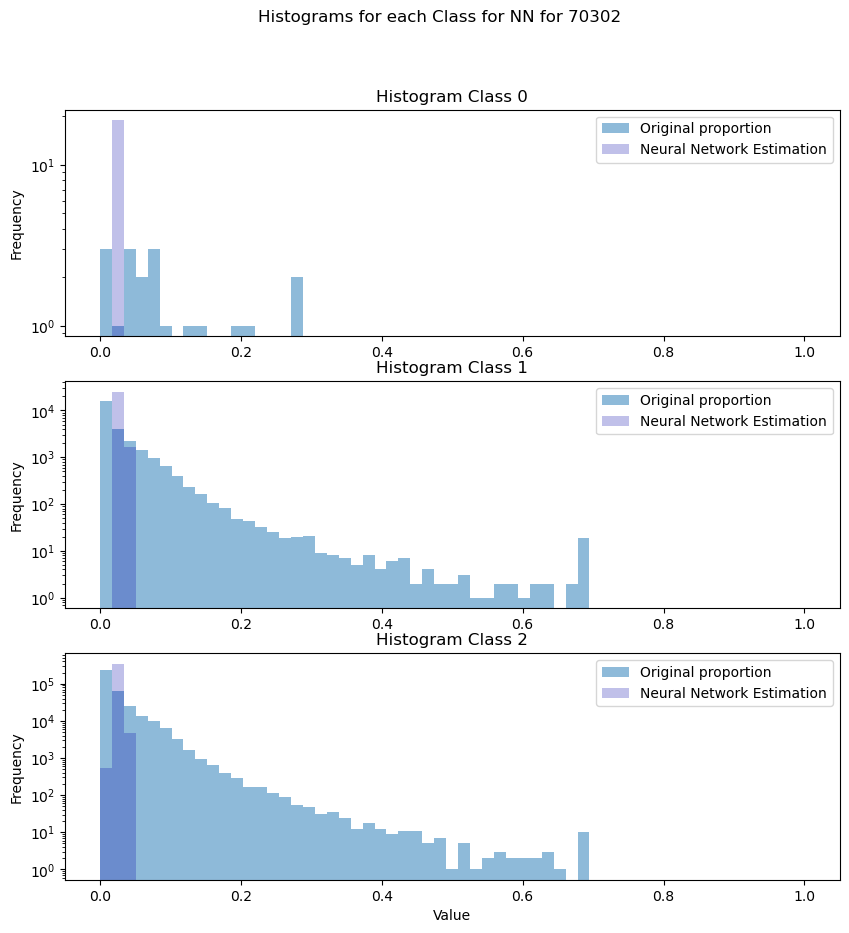

In [170]:
import matplotlib.pyplot as plt

bins = np.linspace(0, 1, 60)

fig = plt.figure(figsize=(10,10))
plt.suptitle("Histograms for each Class for NN for {:s} vehicles".format(vehicle))

plt.subplot(3,1,1)
plt.hist(x=np.clip(y_target_0,0,1), bins=bins,alpha=0.5, rwidth=0.85, histtype='stepfilled', label='Original proportion')
plt.hist(x=np.clip(proportion_pred_0,0,1), bins=bins, color='#0504aa',alpha=0.25, rwidth=0.85, histtype='stepfilled', label= 'Neural Network Estimation',log=True)
plt.title('Histogram Class 0')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(3,1,2)
plt.hist(x=y_target_1, bins=bins,alpha=0.5, rwidth=0.85, histtype='stepfilled', label='Original proportion', log=False)
plt.hist(x=np.clip(proportion_pred_1,0,1), bins=bins, color='#0504aa',alpha=0.25, rwidth=0.85, histtype='stepfilled', label= 'Neural Network Estimation',log=True)
plt.title('Histogram Class 1')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(3,1,3)
plt.hist(x=y_target_2, bins=bins,alpha=0.5, rwidth=0.85, histtype='stepfilled', label='Original proportion')
plt.hist(x=np.clip(proportion_pred_2,0,1), bins=bins, color='#0504aa',alpha=0.25, rwidth=0.85, histtype='stepfilled', label= 'Neural Network Estimation',log=True)
plt.title('Histogram Class 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# plt.text(23, 45, r'$\mu=15, b=3$')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

# Export

In [218]:
df_out = df.copy()
df_out = df_out[['Id','Id_G','proportion']]

df_out['proportion_pred_Lin'] = proportion_pred_Linear
df_out['proportion_pred_GB'] = proportion_pred_GB
df_out['proportion_pred_RF']  = proportion_pred_RF
df_out['proportion_pred_MLP'] = proportion_pred_MLP
#df_out['proportion_pred_SGD'] = proportion_pred_SGD
# #df_out['proportion_pred_SV']  = proportion_pred_SV
# df_out['proportion_pred_Ada'] = proportion_pred_Ada

# df_out['proportion_pred_NN'] = pd.to_numeric(df_out['proportion_pred_NN'].map('{:.5f}'.format))
# #df_out['proportion_pred_SGD'] = pd.to_numeric(df_out['proportion_pred_SGD'].map('{:.5f}'.format))
# df_out['proportion_pred_MLP'] = pd.to_numeric(df_out['proportion_pred_MLP'].map('{:.5f}'.format))
# df_out['proportion_pred_RF']  = pd.to_numeric(df_out['proportion_pred_RF'].map('{:.5f}'.format))
# #df_out['proportion_pred_SV']  = pd.to_numeric(df_out['proportion_pred_SV'].map('{:.5f}'.format))
# df_out['proportion_pred_Ada'] = pd.to_numeric(df_out['proportion_pred_Ada'].map('{:.5f}'.format))


# # Add MSE to df
# df_out['MSE'] = df_out.apply(lambda x: mean_squared_error(x['proportion'].reshape(-1,1), x['proportion_pred'].reshape(-1,1)), axis=1)
#                 df_out.apply(lambda row: mean_squared_error(row['proportion'], row['proportion_pred']), axis=1)
# df_out[df_out['Id_G']==5960]
df_out

,Id,Id_G,proportion,proportion_pred_Lin,proportion_pred_GB,proportion_pred_RF,proportion_pred_MLP
Id,,,,,,,
1,1.0,1.0,0.0,0.004932,0.002879,0.004434,0.000579
2,2.0,1.0,0.0,0.004932,0.002879,0.004434,0.000579
3,3.0,1.0,0.0,0.004932,0.002879,0.004434,0.000579
4,4.0,1.0,0.0,0.004932,0.002879,0.004434,0.000579
5,5.0,1.0,0.0,0.004932,0.002879,0.004434,0.000579
...,...,...,...,...,...,...,...
2370691,2370691.0,23814.0,0.0,0.004932,0.002879,0.004434,0.000579
2370692,2370692.0,23814.0,0.0,0.004932,0.002879,0.004434,0.000579
2370693,2370693.0,23814.0,0.0,0.004932,0.002879,0.004434,0.000579


In [219]:
df_out.to_csv("output/predictions_{:s}.csv".format(vehicle), sep=",", decimal='.', index=False)